# Выпускная квалификационная работа по курсу «Data Science»

В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.

## Изучить теоретические основы и методы решения поставленной задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

<H1>Проведем разведочный анализ предложенных данных</H1>

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонки получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [1]:
%pip install seaborn
print('done') # используется для получения отклика интерпретатора python

Note: you may need to restart the kernel to use updated packages.
done


In [1]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle
print('done') # используется для получения отклика интерпретатора python

done


In [2]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 3128

In [6]:
%pip install openpyxl
print('done')# используется для получения отклика интерпретатора python

Note: you may need to restart the kernel to use updated packages.
done


In [3]:
# Загружаем исходные данные из файла X_bp
X_bp = pd.read_excel('X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [4]:
# Загружаем исходные данные из файла X_nup
X_nup = pd.read_excel('X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

In [5]:
X_bp

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022                    2856.328932               194.754342  

[1023 rows x 10 columns]

In [7]:
X_nup

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                      0     4.000000          57.000000
1                      0     4.000000          60.000000
2                      0     4.000000          70.000000
3                      0     5.000000          47.000000
4                      0     5.000000          57.000000
...                  ...          ...                ...
1035                  90     8.088111          47.759177
1036                  90     7.619138          66.931932
1037                  90     9.800926          72.858286
1038                  90    10.079859          65.519479
1039                  90     9.021043          66.920143

[1040 rows x 3 columns]

Набор данных из файла X_bp содержит индекс + 10 признаков и 1023 строк.

Набор данных из файла X_nup содержит индекс + 3 признака и 1040 строк

Ознакамливаемся со списком признаков объединяемых наборов данных:

In [6]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [7]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

По заданию требуется объединить по типу INNER два набора данных в единый датасет.

In [5]:
# Выполним объединение датасета
df = X_bp.join(X_nup, how='inner') #‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’
df.shape

(1023, 13)

In [13]:
df.head(15).T # Посмотрим на результат объединения и выполним замену строк на столбцы для приведения фрейма к удобочитаемому виду

0            1            2   \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                               3            4            5   \
Соотношение матрица-наполнитель          1.857143     2.771331     2.767918   
Плотность, кг/м3                      2030.000000  2030.000000  2000.000000   
модуль упругости, ГПа                  738.736842   753.000000   748.000000   
Количество отвердителя, м.%            129.000000   111.860000   111.860000   
Содержание эпоксидных групп,%_2         21.250000    22.267857    22.267857   
Температура вспышки, С_2               300.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.000000     5.000000     5.000000   
Плотность нашивки                       47.000000    57.000000    60.000000   

                                               6            7            8   \
Соотношение матрица-наполнитель          2.569620     2.561475     3.557018   
Плотность, кг/м3                      1910.000000  1900.000000  1930.000000   
модуль упругости, ГПа                  807.000000   535.000000   889.000000   
Количество отвердителя, м.%            111.860000   111.860000   129.000000   
Содержание эпоксидных групп,%_2         22.267857    22.267857    21.250000   
Температура вспышки, С_2               284.615385   284.615385   300.000000   
Поверхностная плотность, г/м2          210.000000   380.000000   380.000000   
Модуль упругости при растяжении, ГПа    70.000000    75.000000    75.000000   
Прочность при растяжении, МПа         3000.000000  1800.000000  1800.000000   
Потребление смолы, г/м2                220.000000   120.000000   120.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              5.000000     7.000000     7.000000   
Плотность нашивки                       70.000000    47.000000    57.000000   

                                               9            10           11  \
Соотношение матрица-наполнитель          3.532338     2.919678     2.877358   
Плотность, кг/м3                      2100.000000  2160.000000  1990.000000   
модуль упругости, ГПа                 1421.000000   933.000000  1628.000000   
Количество отвердителя, м.%            129.000000   129.000000   129.000000   
Содержание эпоксидных групп,%_2         21.250000    21.250000    21.250000   
Температура вспышки, С_2               300.000000   300.000000   300.000000   
Поверхностная плотность, г/м2         1010.000000  1010.000000  1010.000000   
Модуль упругости при растяжении, ГПа    78.000000    78.000000    78.000000   
Прочность при р

<p>Перед нами многомерный набор данных.</p>
<p>После объединения двух датасетов в наборе получилось 1023 строки, часть строк из таблицы X_nup была отброшена. </p>
<p>Если бы при объединении таблиц использовались типы соединений left (в случае если X_nup слева), right, outer то данные у которых не было соответствия заполнились бы пустыми значениями - NULL.
Потребовалось бы заполнять данные поля, например, средними значениями или удалить их из множества наблюдений.</p>

In [6]:
# Сохраню объединенные данные
df.to_excel('data_merged.xlsx')

In [12]:
# Узнаем типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Все признаки имеют тип float64, строковых данных нет.

In [16]:
# Выполняем проверку строк на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

In [17]:
# Количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

<p>Пропусков и дубликатов в датасете выявлено не было. Все параметры, за исключением угла нашивки, имеют тип – число с плавающей точкой. 
Тип параметра «Угол нашивки, град» является целым числом. Из полученных данных видно, что строка наблюдений «Угол нашивки, град» имеет всего 2 уникальных значения. Имеет смысл преобразовать в категориальный признак

In [18]:
%pip install Jinja2
print('done') # используется для получения отклика интерпретатора python

Note: you may need to restart the kernel to use updated packages.
done


In [19]:
# Смотрим описательную статистику фрейма
df_descr = df.describe().T # создадим копию датафрейма в удобочитаемом виде(выполняем транспонирование исходного фрейма)
df_descr['median'] = df.median() # посчитаем и добавим значение медианы в датафрейм как указано в задании
df_descr.style.format(precision=4)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codesp

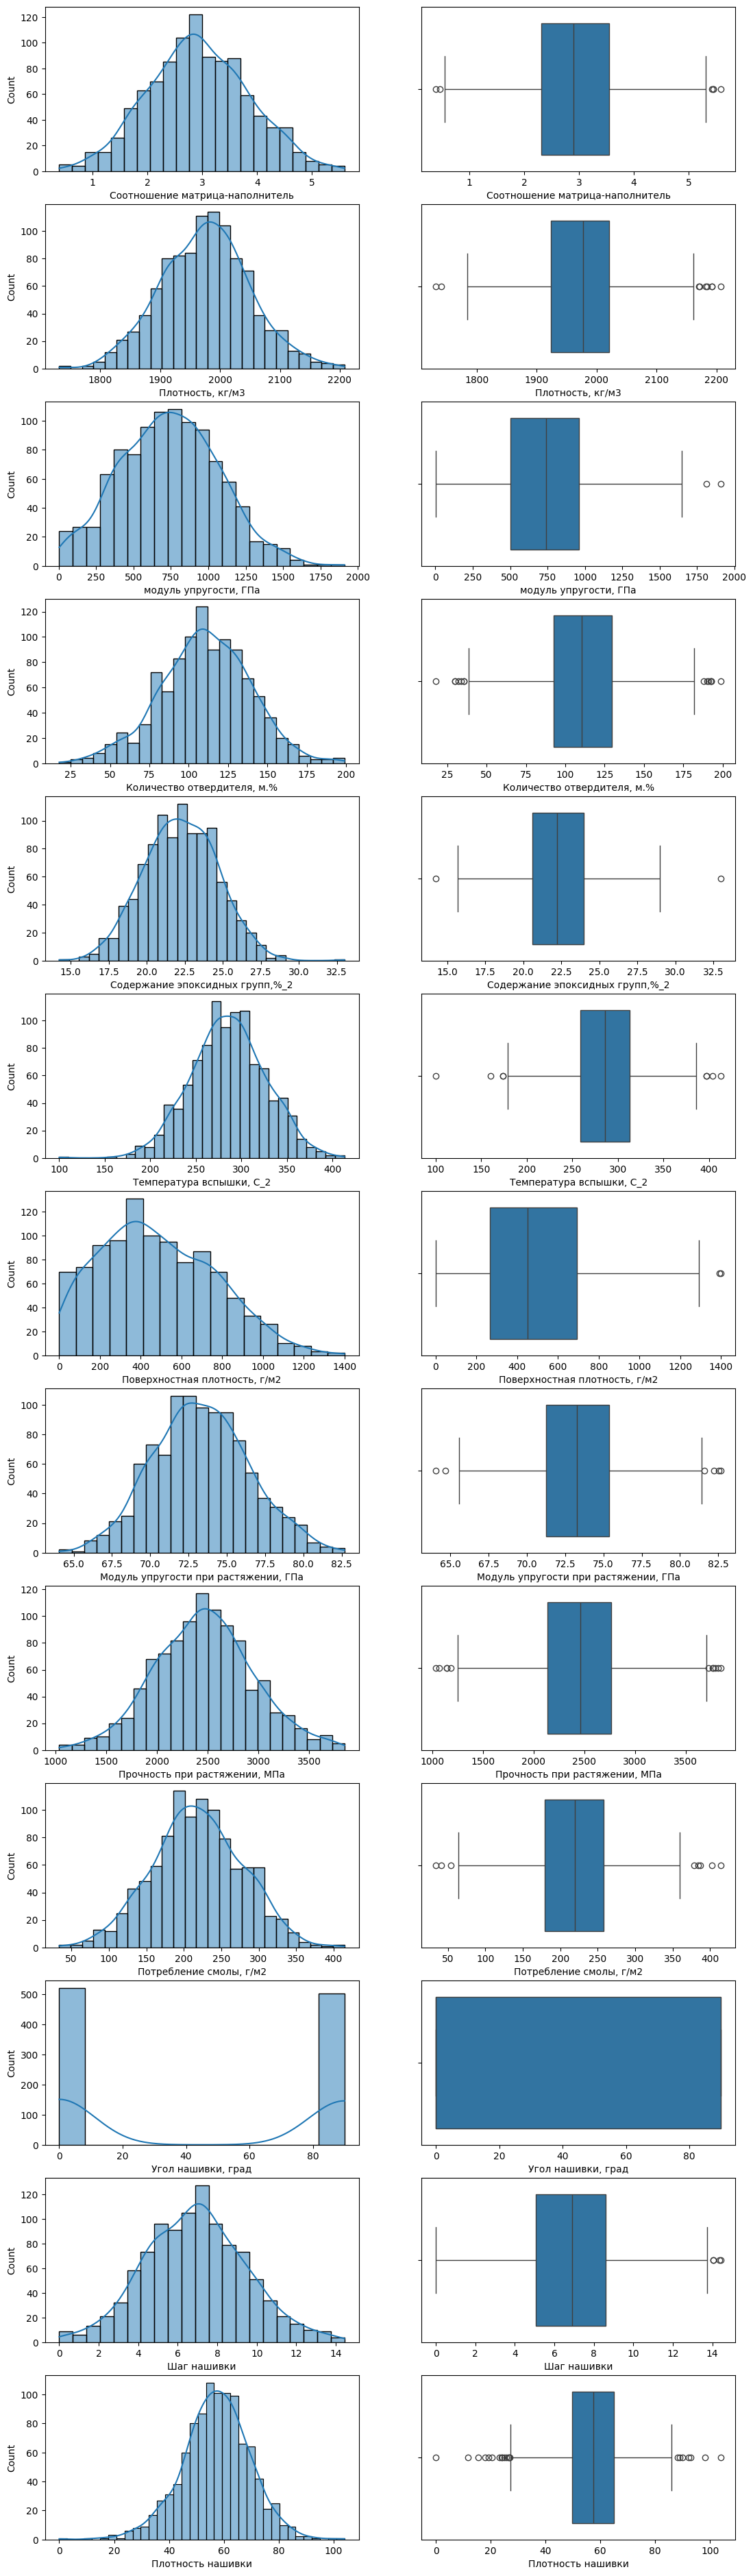

In [20]:
# Выполним построение графиков распределения переменных и boxplot
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

На примере полученных графиков видно что распределение данных подчиняется нормальному распределению - "закону Гаусса".

In [21]:
df.shape

(1023, 13)

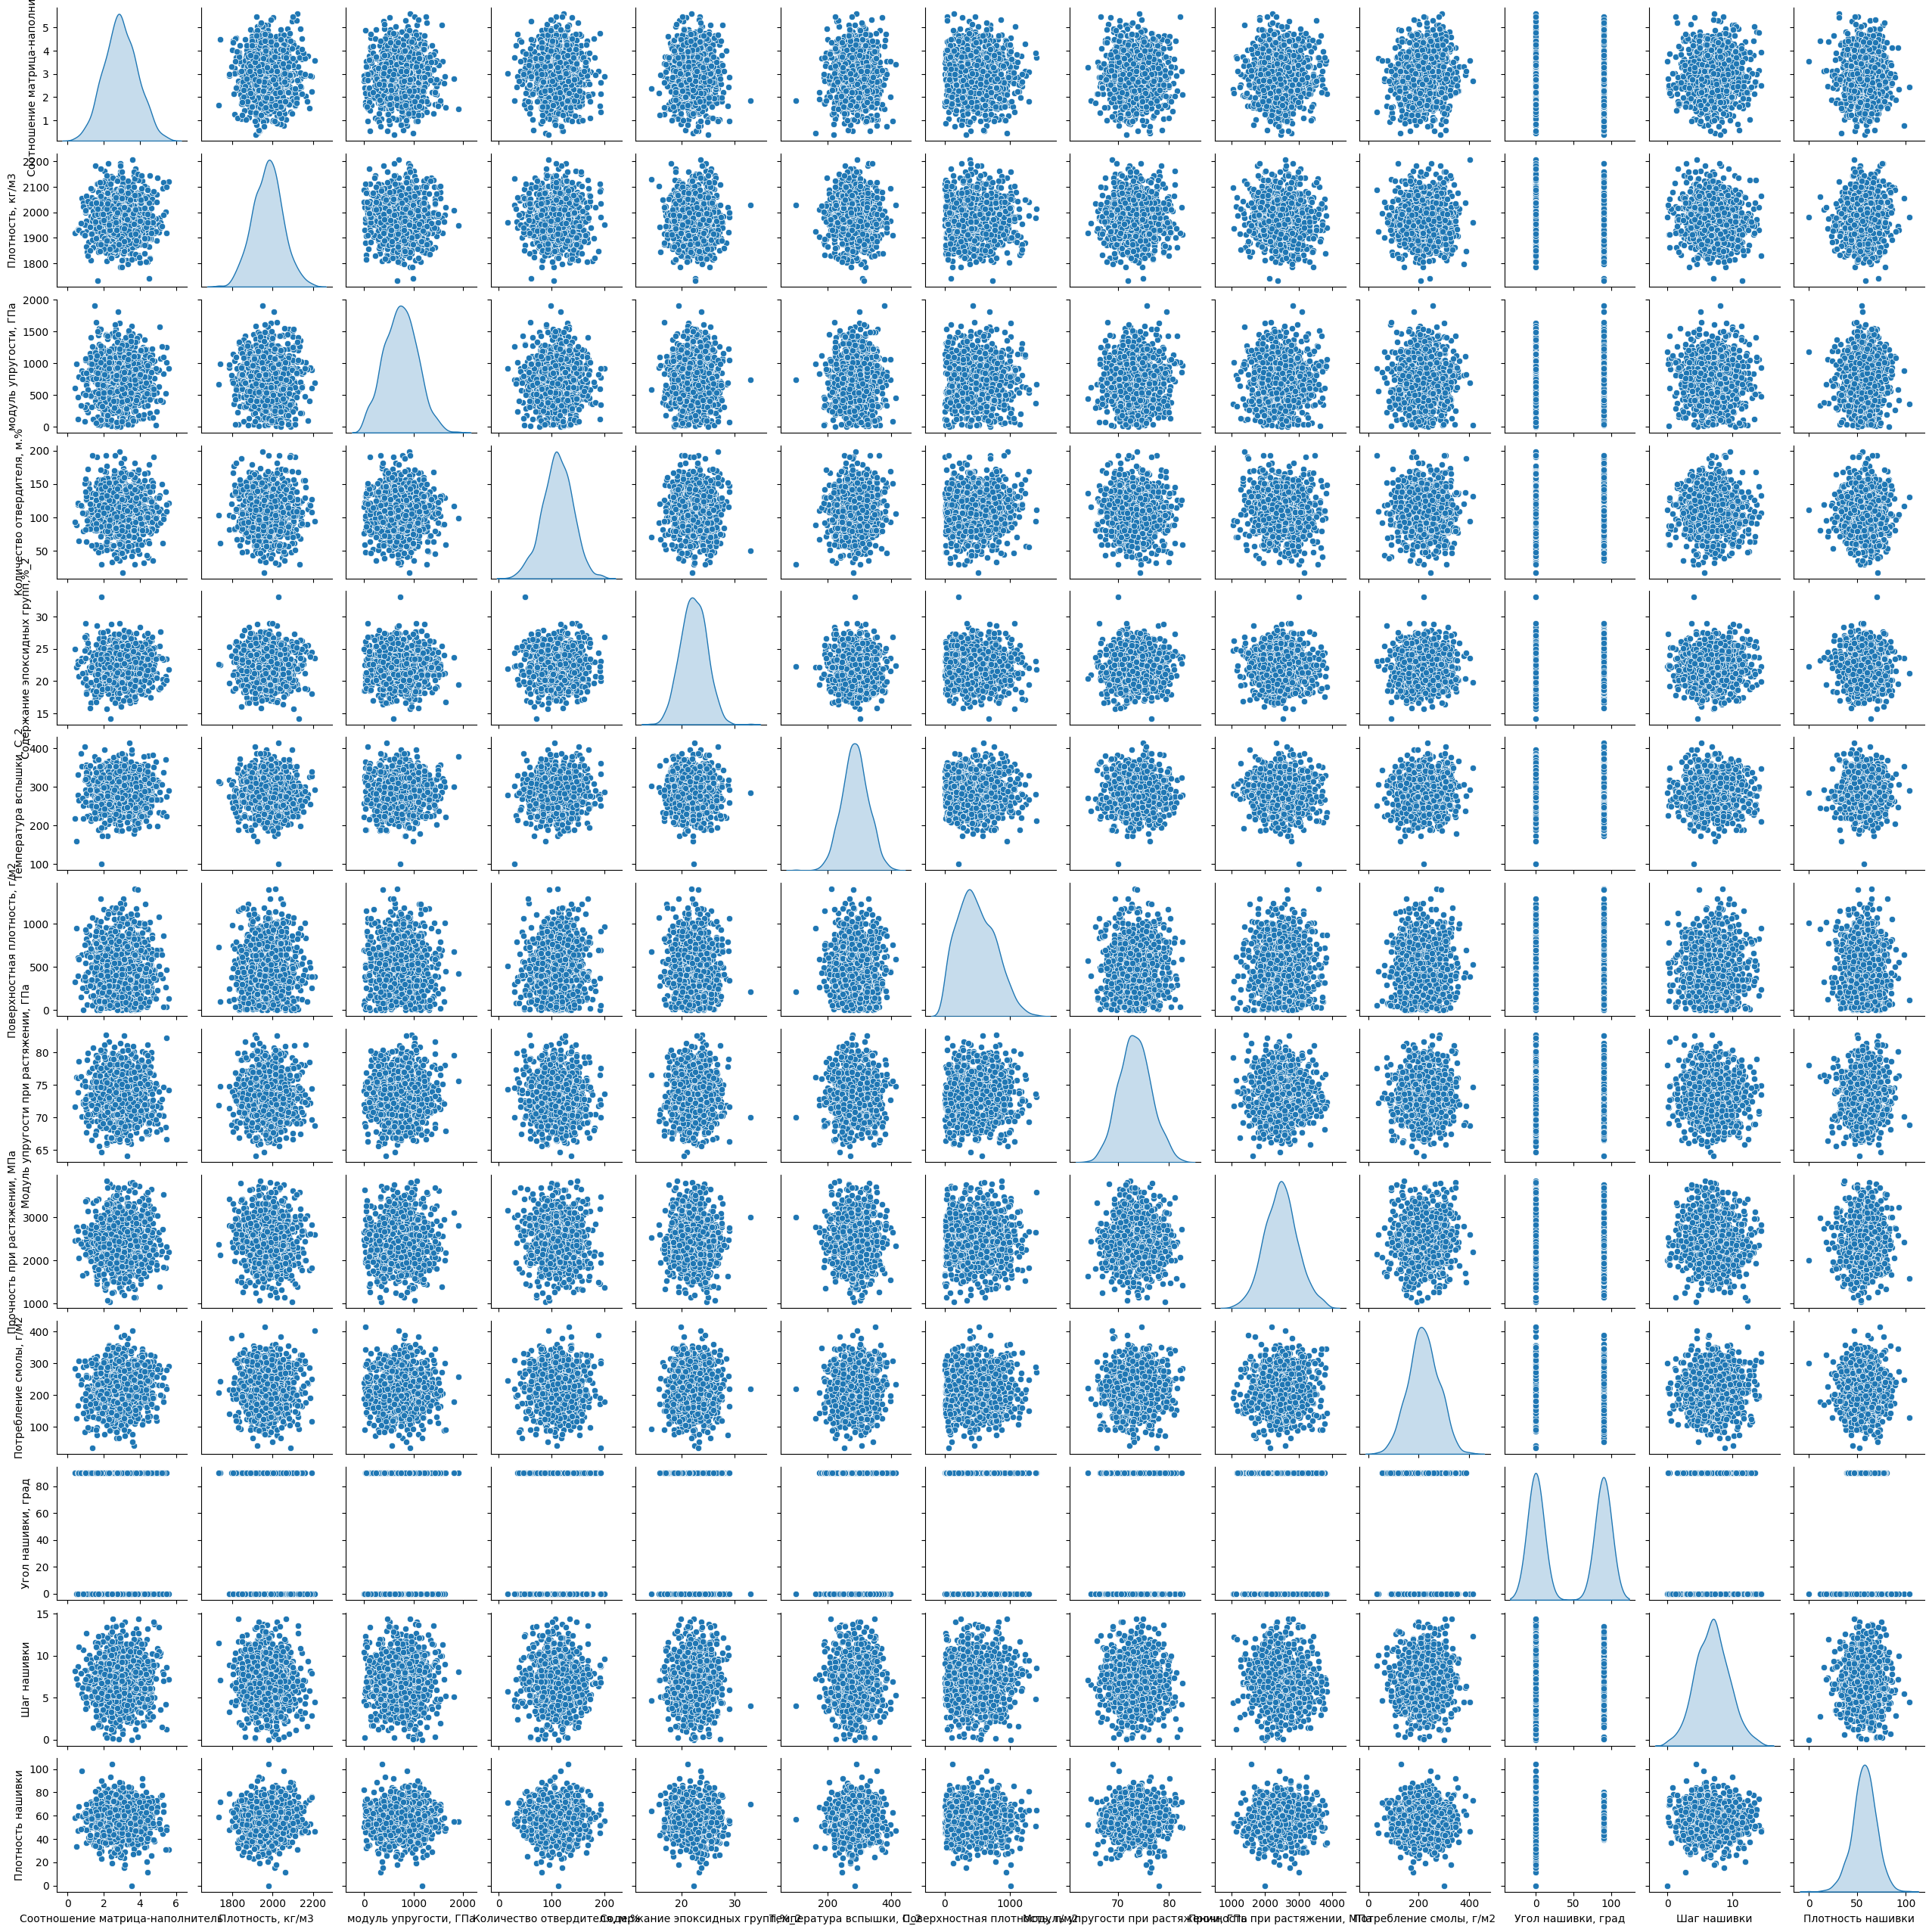

In [15]:
# Построим попарные графики рассеивания для визуализации и анализа взаимосвязи между двумя переменными, а также оценки разброса.
sns.pairplot(df, diag_kind='kde', height=2);

<p>На графиках видно, что есть точки, которые сильно отклоняются от общей тенденции и скорее всего являются выбросами.</p>

Для поиска выбросов будем использовать следующие методы: Z-score оценки (метод 3-х сигм) или межквартильных расстояний.
Проведем эксперимент для получения результатов работы методов и принятия решения по выбросам.

Соотношение матрица-наполнитель: 3s=0 iq=6


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

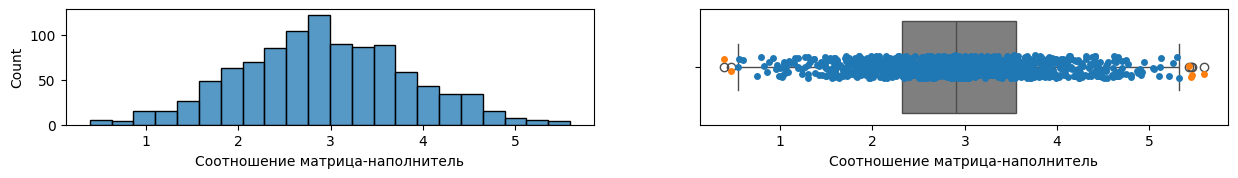

Плотность, кг/м3: 3s=3 iq=9


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-pac

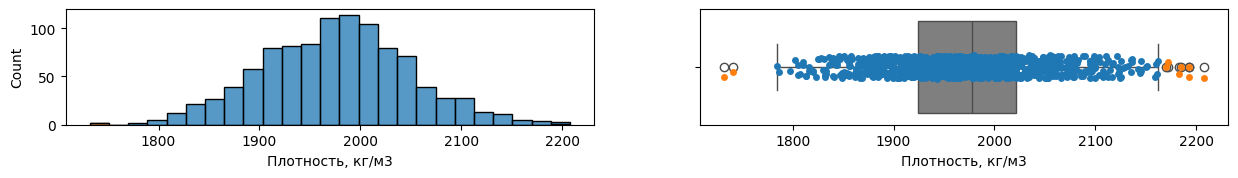

модуль упругости, ГПа: 3s=2 iq=2


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-pac

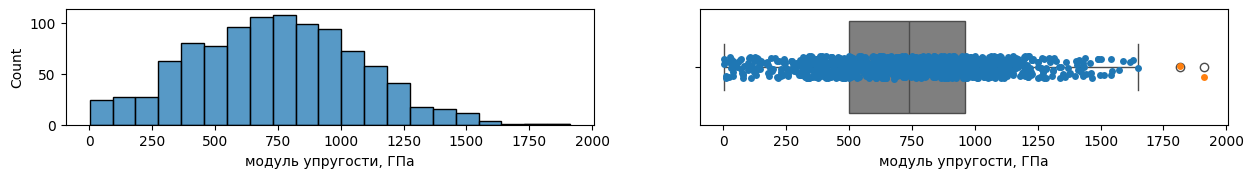

Количество отвердителя, м.%: 3s=2 iq=14


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-pac

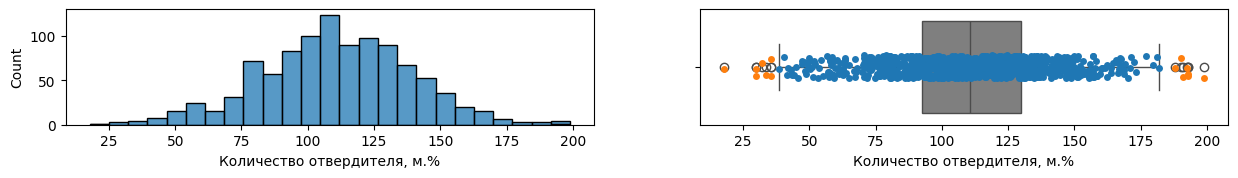

Содержание эпоксидных групп,%_2: 3s=2 iq=2


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-pac

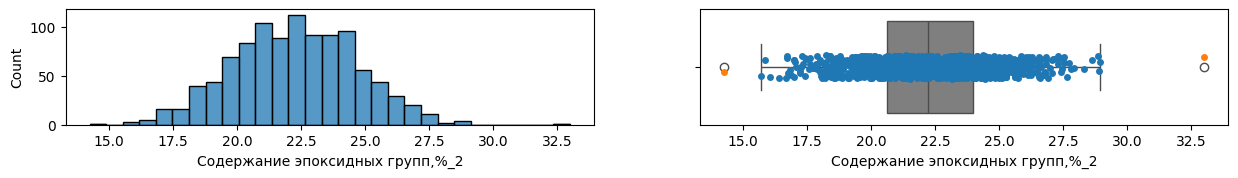

Температура вспышки, С_2: 3s=3 iq=8


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-pac

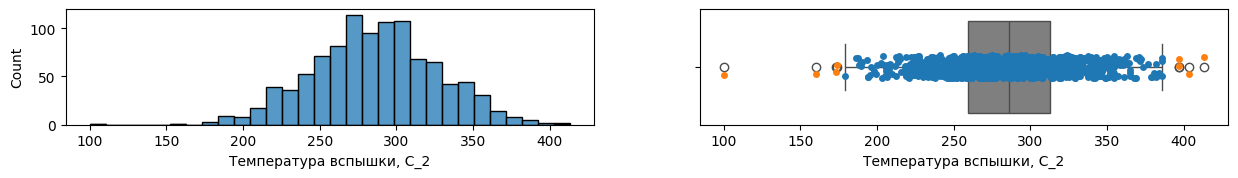

Поверхностная плотность, г/м2: 3s=2 iq=2


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-pac

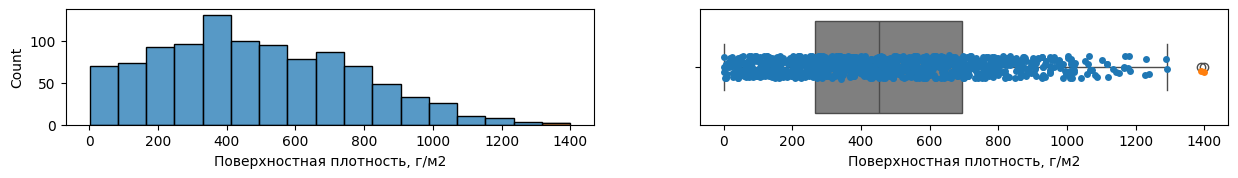

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

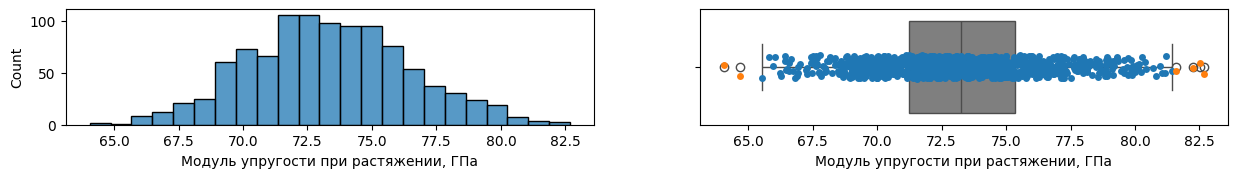

Прочность при растяжении, МПа: 3s=0 iq=11


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

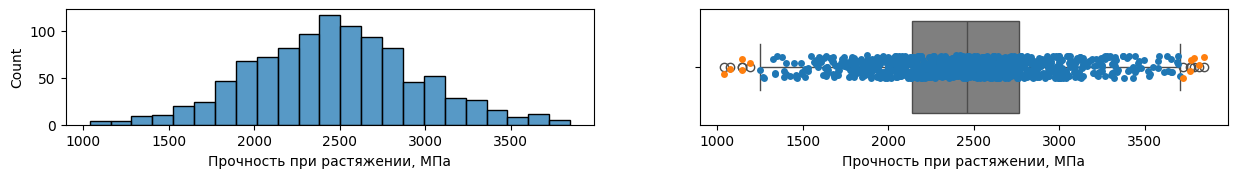

Потребление смолы, г/м2: 3s=3 iq=8


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-pac

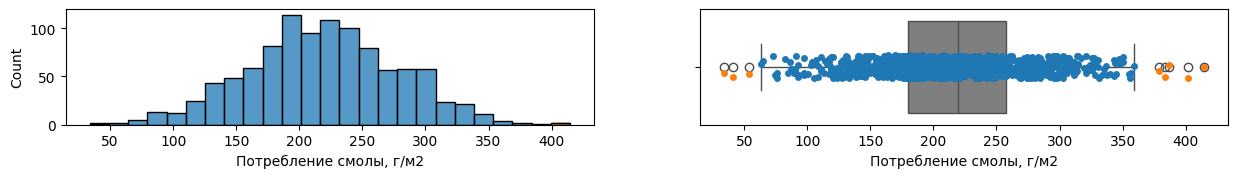

Угол нашивки, град: 3s=0 iq=0


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

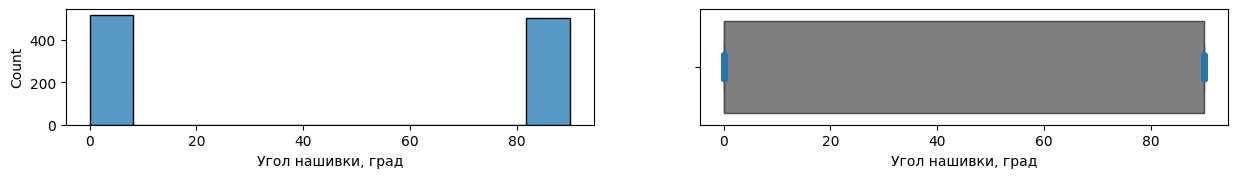

Шаг нашивки: 3s=0 iq=4


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

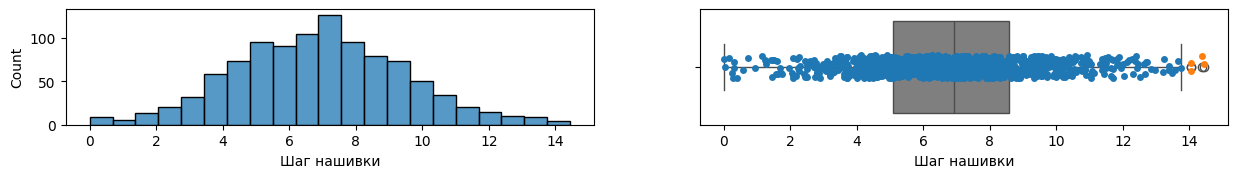

Плотность нашивки: 3s=7 iq=21


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-pac

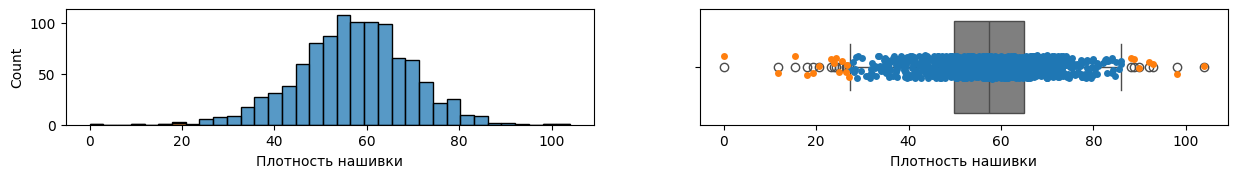

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [7]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1,q3=np.quantile(df[column],[0.25,0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(15, 1.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Результат:
* Метод 3-х сигм, выбросов по всем переменным: 24
* Метод межквартильных расстояний, выбросов по всем переменным: 93

Для обработки выбросов можно использовать 3 стратегии. Их можно отбросить, пометить как выбросы и включить в качестве признака либо преобразовать признак, чтобы ослабить эффект выброса.

Метод "3 сигм" основан на использовании стандартного отклонения для определения выбросов. Если данные имеют нормальное распределение, то метод "3 сигм" может быть более подходящим, так как он учитывает стандартное отклонение, которое является характеристикой нормального распределения.
К тому же метод 3-х сигм показал меньшее количество выбросов, соответственно при исключении выбросов мы потеряем меньше информации. 

In [8]:
# Удаляес выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

<p>Выбросы удалены</p>

In [24]:
# Очищенные данные тоже стоит сохранить
df.to_excel('data_cleaned.xlsx')

<p style="color:">На стадии анализа данных зависимость между переменными не выявлена, и это может означать несколько вещей: 
<ul><li>Во-первых, возможно, что данные не содержат достаточно информации для выявления такой зависимости. В этом случае может потребоваться дополнительный сбор данных или использование других методов анализа данных.<li>Во-вторых, возможно, что зависимость между переменными слишком сложна или нелинейна, и существующие методы анализа данных не могут ее выявить. В этом случае может потребоваться использование более сложных моделей машинного обучения или специализированных методов анализа данных.</li></ul>
В любом случае, если зависимость между переменными не выявлена, это не означает, что ее не существует,  и можно провести, например, анализ корреляции, выполнив построение тепловой карты.</p>

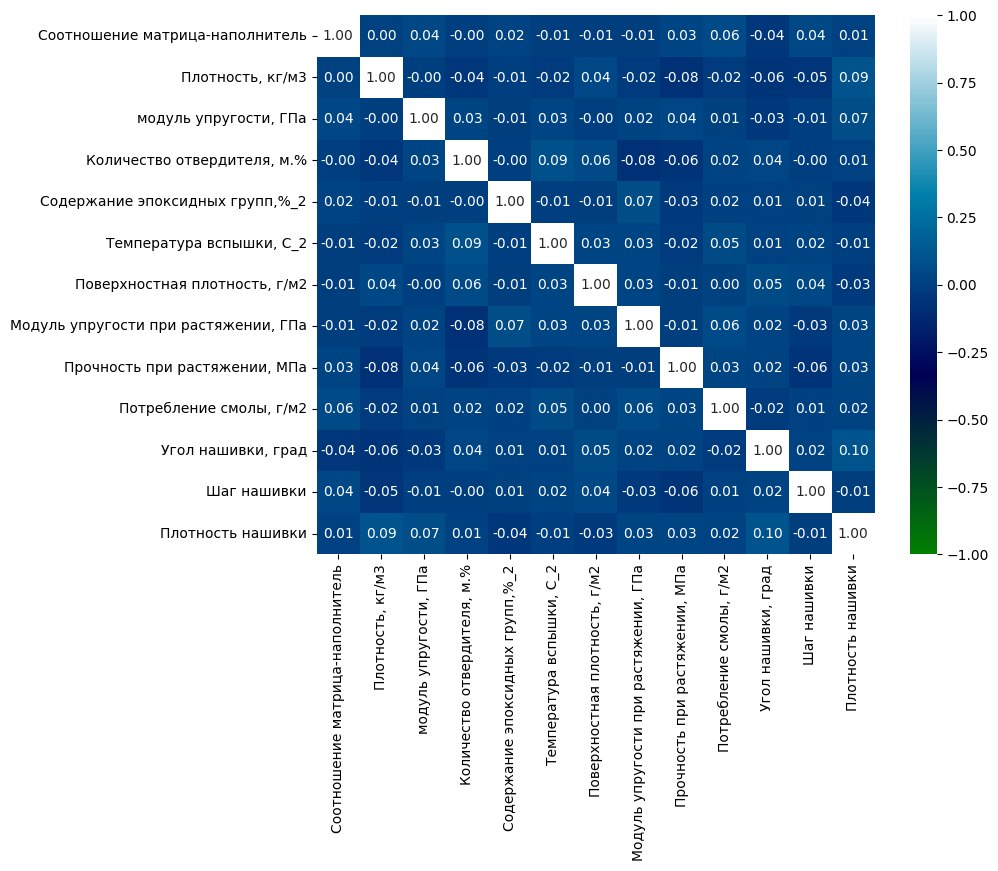

In [26]:
# Определяем корреляцию между параметрами
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='ocean', ax=ax)
plt.show()

На тепловой карте видно, что коэффициенты корреляции, находятся около 0, и показывают отсутствие линейной зависимости между признаками, как между входными так и входными и выходными.


<p>В этом случае, для анализа данных и предсказания будущих значений, лучше использовать алгоритмы машинного обучения, которые не требуют сильной зависимости между входными и выходными данными.

Например, к таким алгоритмам для задачи регрессии относятся:
<ol>
<li>Методы случайного леса.</li>

<li>Методы градиентного бустинга.</li>

<li>Методы глубокого обучения: глубокое обучение - это метод, который используют нейронные сети для анализа данных.</li></ol>

Проведем исследование, предобработку данных и выберем наиболее подходящий алгоритм для нашей задачи.</p>

<H1>Предобработка данных (Препроцессинг)</H1>

Выполнение предобработки данных может существенно повлиять на качество обучения модели. 
В этом разделе необходимо:
* разделить данные на входные и выходные признаки
* разделить данные на категориальные и численные
* выполнить масштабирование данных

In [9]:
# Загрузить данные, подготовленные на предыдущем шаге
df = pd.read_excel('data_cleaned.xlsx', index_col=0)

<h3>Формируем датасеты для тренировки моделей</h3>

<p>Поскольку мы имеем дело с многомерным набором данных, то первым делом на данном этапе необходимо выполнить разделение признаков на входные и выходные.
Входные будем использовать для обучения модели.
Обратимся к заданию. Нам нужно выбрать алгоритм и обучить 2 модели машинного обучения для предсказания значений модуля упругости и прочности при растяжении, а также выполнить настройку модели нейронной сети, которая будет рекомендовать значение соотношение матрица-наполнитель.  
Таким образом нужно определить 3 конфигурации признаков в датасете для каждой из моделей.</p>
<p>Исходя из технологического процесса создания композиционного материала, а также стоящих перед нами задач, для определения прочности и упругости соединения при растяжении нам потребуются свойства матрицы, наполнителя, а также соотношение матрица-наполнитель.
<br>На этапе проектирования композиционного материала инженеры выбирают оптимальное соотношение матрица-наполнитель для получения материала с нужными свойствами и минимальных затратах. Соответственно, если у нас имеются требуемые значения упругости и прочности комозитного материала, то инженеру для определения соотношения матрица-наполнитель потребуются свойства матрицы, наполнителя и имеющиеся заданные характеристики материала. 
<br><br>Исходя из вышесказанного сформируем следующие конфигурации моделей.</p>

In [10]:
# Признаки для задачи упругости                                
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [11]:
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [12]:
# Признаки для задачи прочности                           
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [13]:
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [14]:
# Признаки для задачи матрица-наполнитель                             
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]

In [15]:
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

In [16]:
# Разделю переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

<h3>Шкалирование и категоризации признаков</h3>
Набор данных, который мы будем шкалировать многомерный, а также не имеет явных зависимостей между признаками.
В таком случае целесообразно применить StandardScaler, который преобразует значения каждого признака в стандартное отклонение, 
что позволит сравнить значения разных признаков. Если бы корреляция между признаками всё-таки была, то после применения StandardScaler 
признаки имели бы одинаковые значения стандартного отклонения, что привело бы к скрытию информации о взаимосвязи между ними. 

In [18]:
from sklearn.preprocessing import OneHotEncoder

Чтобы после кодирования признаков модели не запутались, ложно предположив, что данные из категориального признака связаны порядком или иерархией применим OneHotEncoder.
OneHotEncoder используется для преобразования категориальных признаков в векторы, где каждый элемент вектора соответствует одному из возможных значений. Все значения из категориального признака кодируются независимо друг от друга. 

In [19]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OneHotEncoder(), x_categorical)
])

In [20]:
# Препроцессор для 2-й задачи
preprocessor2 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OneHotEncoder(), x_categorical)
])

In [21]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OneHotEncoder(), x_categorical)
])

<h1>Разработка и обучение моделей</h1>

В данном разделе выполним:<ul>
<li>написание вспомогательных функций</li>
<li>обучение  моделей для прогноза модуля упругости при растяжении и прочности при растяжении.</li>
<li>разделение данных методом train_test_split с параметром test_size=0.3</li>
<li>поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, с KFold = 10.</li></ul>

<h3>Написание вспомогательных функций</h3>

Функции show_statistics, run_models, run_grid_search позволят пользоваться одним и тем же кодом в разных частях Notebook'a, а также сделает 
его более читаемым.

In [54]:
# Функция сравнения распределения признаков до и после обработки 
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

In [55]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE) #метод KFold делит все образцы на 10 блоков 
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

In [56]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

И еще одна вспомогательная функция для получения метрик предсказания.

In [90]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

<H1>Обучение моделей</H1>

### Модель для модуля упругости при растяжении, ГПа

In [58]:
# Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


Перед масштабированием датасета предупреждаем проблему утечки данных.
Если мы сразу отмасштабируем все данные (и обучающую, и тестовую выборки), то информация из тестовой части «утечет» в обучающую просто потому, что, в случае стандартизации, среднее и СКО будет рассчитываться на основе всех данных. Как следствие, модель на этапе обучения уже «увидит» тестовые данные, а значит качество модели «на тесте» может быть неоправданно завышено.

In [59]:
#производим рассчет занчений среднего арифметическое(st_scaler.mean_) и СКО(scaler.scale_) каждого из столбцов(.fit()) тренировочной выборки с 
#последующим использованием этих расчитанных значений для стандартизации(.transform()).
x1_train = preprocessor1.fit_transform(x1_train_raw)
#Использование расчитанных значений среднего арифметическое(st_scaler.mean_) и СКО(MSE) каждого из столбцов(.fit()) тренировочной выборки
#для масштабирования тестовой выборки.
x1_test = preprocessor1.transform(x1_test_raw)

In [60]:
#pd.DataFrame(x1_train, columns=x1_columns_ohe)

In [61]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [62]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

In [63]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical + x_categorical)))

In [65]:
# Сравнение моделей с параметрами по умолчанию
def_models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1_1 = run_models(def_models1, x1_train, y1_train)
stat1_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не оказалась подходящей  для наших данных. 

Коэффициент детерминации R2 близок к 0 для линейных моделей и метода опорных векторов. Значит, они не лучше базовой модели. И остальные метрики у них примерно совпадают с базовой моделью.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали метод ближайших соседей и деревья решений.

Случайный лес отработал лучше, чем одно дерево решений, но хуже, чем линейные модели.

In [66]:
# Приступаем к поиску лучших моделей
s_models1 = {}

In [67]:
params1 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1510, 10)
  },           
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1510, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params      MAE  rank
273  {'alpha': 550, 'solver': 'lsqr'} -2.45601     1

In [68]:
params1 = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
search, smodel = run_grid_search(Lasso(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
6  {'alpha': 0.15} -2.459921     1

In [69]:
params1 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'C': [0.01, 0.02, 0.03, 0.04]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.01, 0.02, 0.03, 0.04, 0.5]
    }
]
search, smodel = run_grid_search(SVR(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
3  {'C': 0.015, 'kernel': 'linear'} -2.457723     1

In [70]:
params1 = {
    'n_neighbors': range(3, 31, 2)
}
search, smodel = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params       MAE  rank
13  {'n_neighbors': 29} -2.453756     1

In [77]:
params1 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

params  \
159  {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 10, 'random_state': 3128, 'splitter': 'random'}   

         MAE  rank  
159 -2.43505     1

In [ ]:
params1 = {
    'random_state': [RANDOM_STATE],
    'n_estimators': [50, 100], 
    'criterion': ['absolute_error'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
search, smodel = run_grid_search(RandomForestRegressor(), params1, x1_train, y1_train)
s_models1[str(smodel)] = smodel
search[search['rank']==1]

In [71]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat1_2 = run_models(s_models1, x1_train, y1_train)
stat1_2.style.highlight_max(axis=0)

Можно сделать вывод, что подбирая гиперпараметры, можно значительно улучшить предсказание выбранной модели. 

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели. 

Линейные модели так и остались сравнимы с базовой моделью. Их характеристики улучшились, но не значительно.

Метод опорных векторов в процессе подбора гиперпараметры лучшим ядром выбрал линейное и отработал аналогично линейным моделям, получил очень близкие метрики.

Метод ближайших соседей увеличением количества соседей радикально улучшил качество работы. Но его лучшие результаты все равно немного, но отстают от линейных моделей.

Деревья решений при к подборе параметров превзошли результат линейной модели. Но они по-прежнему не являются объясняющей зависимость моделью.

In [72]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [73]:
# Предсказание лучшей модели
best_model1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, max_features=10, random_state=RANDOM_STATE, splitter='random')
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

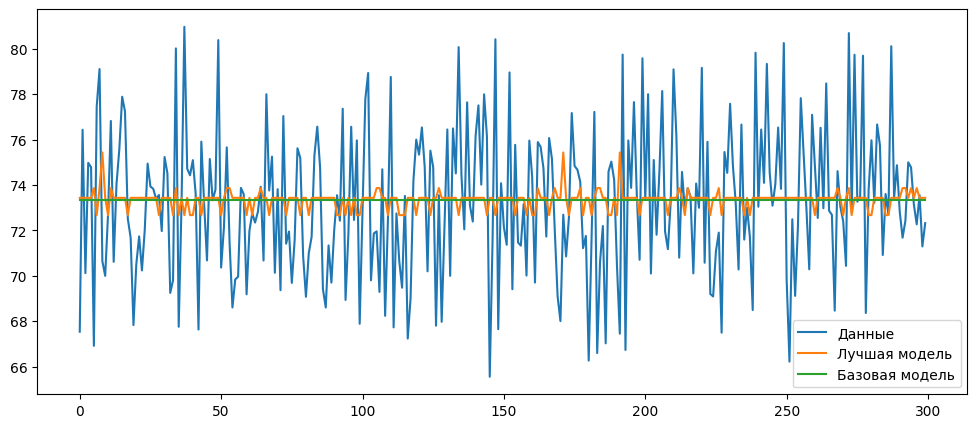

In [75]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Данные')
ax.plot(y1_pred_best, label='Лучшая модель')
ax.plot(y1_pred_base, label='Базовая модель')
ax.legend()
plt.show()

На сформированном графике видим, насколько не соответствует лучшая модель исходным данным.

In [91]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare1 = get_metrics('Базовая модель', y1_test, y1_pred_base)
compare1 = compare1._append(get_metrics('Лучшая модель (дерево решений)', y1_test, y1_pred_best))
compare1

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2      RMSE       MAE      MAPE  \
Базовая модель                 -0.001377 -3.222954 -2.577796 -0.035319   
Лучшая модель (дерево решений) -0.022690 -3.257073 -2.595509 -0.035565   

                                max_error  
Базовая модель                  -7.800690  
Лучшая модель (дерево решений)  -8.296414

<H3>Модель для прочности при растяжении, МПа</H3>

In [93]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [95]:
# Выполняю препроцессинг входных переменных
x2_train = preprocessor2.fit_transform(x2_train_raw)
x2_test = preprocessor2.transform(x2_test_raw)

In [96]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [97]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [99]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical+ x_categorical)))

In [101]:
# Описательная статистика выходной переменной
#show_statistics(y2_train)

In [102]:
# Запускаю различные модели с параметрами по умолчанию
models2_def = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2_1 = run_models(models2_def, x2_train, y2_train)
stat2_1.style.highlight_max(axis=0)

Ни одна из выбранных мной моделей не соответствует данным.

R2 близок к 0 для линейных моделей и метода опорных векторов.

Гораздо хуже линейных с гиперпараметрами по умолчанию отработали деревья решений.

Градиентный бустинг с параметрами по умолчанию отработал лучше дерева, сравнимо с базовой моделью.

In [103]:
# Приступаем к поиску лучших моделей
s_models2 = {}

In [104]:
params2 = [
  {
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'alpha': range(10, 1000, 10)
  },
  {
    'solver': ['sag', 'saga'],
    'alpha': range(10, 1000, 10),
    'random_state': [RANDOM_STATE]
  },
  {
    'solver': ['lbfgs'],
    'alpha': range(10, 1000, 10),
    'positive': [True]
  }
]
search, smodel = run_grid_search(Ridge(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
493  {'alpha': 990, 'solver': 'lsqr'} -385.909835     1

In [105]:
params2 = [
  {
    'alpha': [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100]
  }
]
search, smodel = run_grid_search(Lasso(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
8   {'alpha': 60} -385.827028     1
9  {'alpha': 100} -385.827028     1

In [106]:
params2 = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]

search, smodel = run_grid_search(SVR(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params         MAE  rank
14  {'C': 0.3, 'gamma': 'scale', 'kernel': 'rbf'} -385.718687     1

In [107]:
params2 = {
    'random_state': [RANDOM_STATE],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3],
    'max_features': range(1, 11, 1)
}
search, smodel = run_grid_search(DecisionTreeRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
9   {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 5, 'random_state': 3128, 'splitter': 'random'}   
11  {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 6, 'random_state': 3128, 'splitter': 'random'}   
69   {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 5, 'random_state': 3128, 'splitter': 'random'}   
71   {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 6, 'random_state': 3128, 'splitter': 'random'}   

           MAE  rank  
9  -384.988685     1  
11 -384.988685     1  
69 -384.988685     1  
71 -384.988685     1

In [110]:
params2 = {
    'random_state': [RANDOM_STATE],
    'loss': ['squared_error', 'absolute_error'], 
    #'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
search, smodel = run_grid_search(GradientBoostingRegressor(), params2, x2_train, y2_train)
s_models2[str(smodel)] = smodel
search[search['rank']==1]

params  \
0  {'loss': 'squared_error', 'max_depth': 1, 'max_features': 1, 'n_estimators': 50, 'random_state': 3128}   

          MAE  rank  
0 -385.759012     1

In [109]:
# Сравнение моделей с подобранными параметрами, поиск лучшей
stat2_2 = run_models(s_models2, x2_train, y2_train)
stat2_2.style.highlight_max(axis=0)

Так же применил несколько линейных моделей и ансамбли. Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь я применил GradientBoosting. После подбора параметров он оказался немного лучше остальных моделей. Но по-прежнему крайне плохо описывает исходные данные и не может применяться в рабочем приложении.

Подбор гиперпараметров не помог получить модель, превосходящую базовую. Все модели крайне плохо описывают исходные данные. Не удалось добиться коэффициента детерминации, большего нуля.

Линейные после подбора немного улучшили характеристики. 

Метод опорных векторов отработал аналогично линейным моделям.

Деревья решений после подбора параметров улучшили неудачный результат с параметрами по умолчанию.

Но лучший результат дает градиентный бустинг. Значения ошибок примерно такие же, как у дерева решений. Но коэффициент детерминации немного больше, что показывает чуть лучшую объясняющую способность модели.

In [111]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [112]:
# Предсказание лучшей модели
best_model2 = GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50, random_state=RANDOM_STATE)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

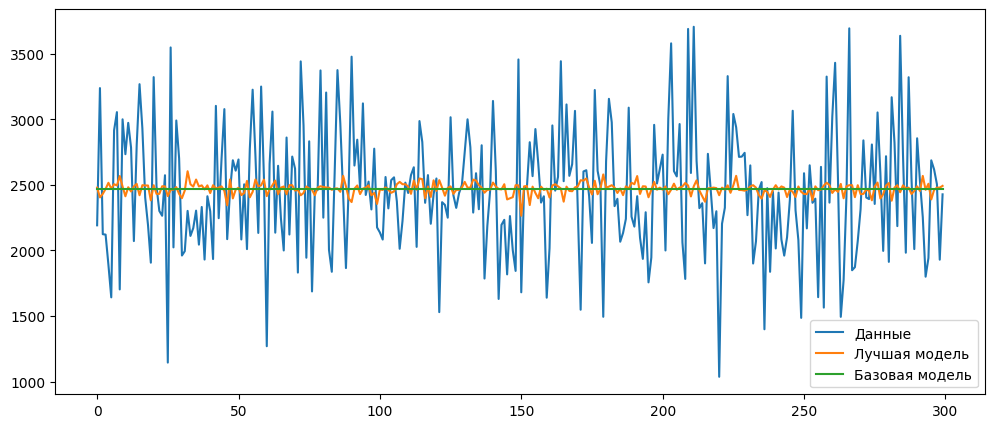

In [114]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Данные')
ax.plot(y2_pred_best, label='Лучшая модель')
ax.plot(y2_pred_base, label='Базовая модель')
ax.legend()
plt.show()

Визуализируя результаты градиентного бустинга с выбранными параметрами, мы видим насколько они плохи и далеки от исходных данных. Но результаты выглядят более "естественно", чем те, что получены деревом решений для модуля упругости при растяжении.

In [116]:
# Сравнение предсказаний базовой модели и лучшей модели на тестовом множестве
compare2 = get_metrics('Базовая модель', y2_test, y2_pred_base)
compare2 = compare2._append(get_metrics('Лучшая модель (градиентный бустинг)', y2_test, y2_pred_best))
compare2

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2        RMSE         MAE  \
Базовая модель                      -0.000531 -479.694153 -375.066608   
Лучшая модель (градиентный бустинг)  0.001934 -479.102842 -376.142801   

                                         MAPE    max_error  
Базовая модель                      -0.165566 -1431.321957  
Лучшая модель (градиентный бустинг) -0.165889 -1384.389091

### Модель для соотношения матрица-наполнитель

<p>Произвожу построение модели нейронной сети с использоваением k-Fold валидации.<br>
Пример k-Fold валидации взят с ресурса https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb</p>

In [190]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import csv
from sklearn import preprocessing
print("done")

done


In [191]:
import os
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
print("done")

done


In [192]:
from tensorflow import keras
print("done")

done


In [193]:
from tensorflow.keras import layers
print("done")

done


In [194]:
from keras import models
print("done")

done


In [195]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print("done")

done


In [196]:
# Представление об ошибках
def error(y_true, y_pred):
    print(f'{mean_absolute_error(y_true, y_pred)=}')
    print(f'{mean_absolute_percentage_error(y_true, y_pred)=}')
    print(f'{mean_squared_error(y_true, y_pred)=}') 

ВАЖНО!!!<br>
В случае выполнения k-fold валидации, можно не выполнять train_test_split для разделения данных на обучающую и тестовую выборки. Затем можно использовать эти группы для обучения и валидации модели.

Также не рекомендуется выполнять нормализацию данных после k-fold валидации. Это связано с тем, что k-fold валидация предполагает разделение данных на k групп, и каждая группа используется для обучения и валидации модели. Если выполнить нормализацию данных после валидации, то изменится распределение данных, что может привести к неправильной оценке производительности модели. Поэтому лучше нормализовать данные перед валидацией, чтобы все группы данных были нормализованы одинаково.

In [197]:
#Нормализация with MinMaxScaler

processed = MinMaxScaler().fit_transform(df)#расчет средних значений и масштабирование

col = df.columns
df_norm = pd.DataFrame(processed, columns = col, index=df.index)
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            0.282131          0.601381   
3                            0.282131          0.601381   
4                            0.457857          0.601381   
5                            0.457201          0.527898   
6                            0.419084          0.307448   
...                               ...               ...   
1018                         0.361750          0.410540   
1019                         0.587163          0.650588   
1020                         0.555750          0.460227   
1021                         0.637396          0.691520   
1022                         0.657131          0.259472   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                  0.447061                     0.123047   
3                  0.447061                     0.608021   
4                  0.455721                     0.502800   
5                  0.452685                     0.502800   
6                  0.488508                     0.502800   
...                     ...                          ...   
1018               0.552781                     0.350139   
1019               0.268550                     0.712271   
1020               0.251612                     0.494656   
1021               0.448724                     0.684130   
1022               0.251903                     0.609147   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                            0.607435                  0.482823   
3                            0.418887                  0.549664   
4                            0.495653                  0.482823   
5                            0.495653                  0.482823   
6                            0.495653                  0.482823   
...                               ...                       ...   
1018                         0.333908                  0.657301   
1019                         0.294428                  0.350746   
1020                         0.623085                  0.325580   
1021                         0.267818                  0.444436   
1022                         0.888354                  0.553803   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                          0.162230                              0.319194   
3                          0.162230                              0.319194   
4                          0.162230                              0.319194   
5                          0.162230                              0.319194   
6                          0.162230                              0.319194   
...                             ...                                   ...   
1018                       0.161609                              0.485125   
1019                       0.271207                              0.475992   
1020                       0.572959                              0.573346   
1021                       0.496511                              0.536217   
1022                       0.587373                              0.550550   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                          0.698235                 0.517418   
3                          0.698235                 0.517418   
4                          0.698235                 0.517418   
5                          0.698235                 0.517418   
6                          0.698235                 0.517418   
...                             ...                      ...   
1018                       0.480312                 0.242759   
1019                       0.470745                 0.221717   
1020                       0.578340                 0.565435   
1021                       0.368070                 0.451281   
1022                       0.647135                 0.444423   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [198]:
#Входные и выходные данные
inputcol = ["Плотность, кг/м3","модуль упругости, ГПа",
            "Количество отвердителя, м.%",
            "Содержание эпоксидных групп,%_2",
            "Температура вспышки, С_2",
            "Поверхностная плотность, г/м2",
            "Потребление смолы, г/м2",
            "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
result1 = ['Соотношение матрица-наполнитель']
result2 = ['Модуль упругости при растяжении, ГПа']
result3 = ['Прочность при растяжении, МПа']
X_train = df_norm[inputcol]
y_train1 = df_norm[result1]
y_train2 = df_norm[result2]
y_train3 = df_norm[result3]

In [199]:
Xtrn1, Xtest1, Ytrn1, Ytest1 = train_test_split(X_train, y_train1, test_size=0.3, random_state=42)
Xtrn2, Xtest2, Ytrn2, Ytest2 = train_test_split(X_train, y_train2, test_size=0.3, random_state=42)
Xtrn3, Xtest3, Ytrn3, Ytest3 = train_test_split(X_train, y_train3, test_size=0.3, random_state=42)

In [200]:
def build_model():
    model=models.Sequential() 
    model.add(layers.Dense(64, activation='tanh', input_shape=(Xtrn1.shape[1],)))
    model.add(layers.Dense(64, activation='tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # выбрать метрику
    return model
# строим модель

In [201]:
k = 4 
num_val_samples = len(Xtrn1) // k
num_epochs = 50
all_scores = []
for i in range(k):
    print('processing fold #', i)
    
    val_data = Xtrn1[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Ytrn1[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [Xtrn1[:i * num_val_samples],
         Xtrn1[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [Ytrn1[:i * num_val_samples],
         Ytrn1[(i + 1) * num_val_samples:]],
        axis=0)
    
 
    model = build_model()

    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print("done")  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
done


In [202]:
all_scores 

[0.13953165709972382,
 0.13406844437122345,
 0.1434311717748642,
 0.15035301446914673]

In [203]:
np.mean(all_scores) 

0.14184607192873955

In [204]:
num_epochs = 50
all_mae_histories = []
for i in range(k):
    print('processing fold #%d' % i)
    val_data = Xtrn1[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Ytrn1[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [Xtrn1[:i * num_val_samples],
         Xtrn1[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [Ytrn1[:i * num_val_samples],
         Ytrn1[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
print("done")

processing fold #0
processing fold #1
processing fold #2
processing fold #3
done


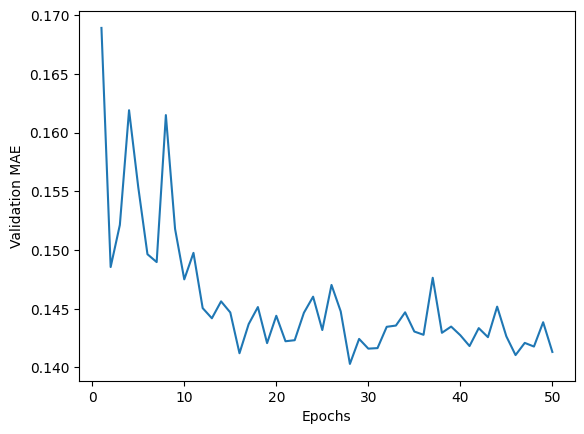

In [205]:
average_mae_history =[
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

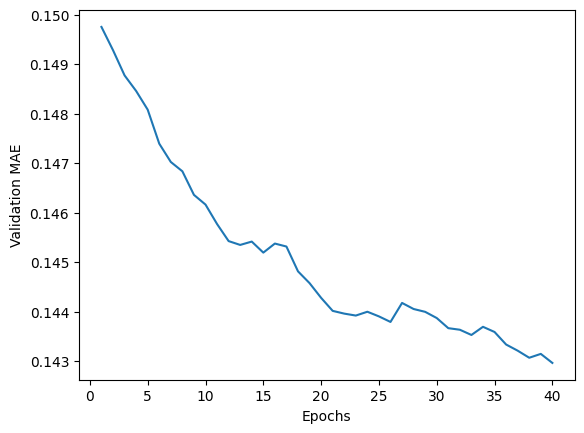

In [206]:
#Сглаживание графика
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [207]:

model= build_model()

model.fit(Xtrn1, Ytrn1,
         epochs=30, batch_size=4, verbose=1)
test_mse_score, test_mae_score = model.evaluate(Xtest1, Ytest1)

Epoch 1/30
175/175 [==============================] - 0s 751us/step - loss: 0.0445 - mae: 0.1691
Epoch 2/30
175/175 [==============================] - 0s 752us/step - loss: 0.0391 - mae: 0.1589
Epoch 3/30
175/175 [==============================] - 0s 742us/step - loss: 0.0367 - mae: 0.1558
Epoch 4/30
175/175 [==============================] - 0s 746us/step - loss: 0.0366 - mae: 0.1538
Epoch 5/30
175/175 [==============================] - 0s 768us/step - loss: 0.0339 - mae: 0.1474
Epoch 6/30
175/175 [==============================] - 0s 742us/step - loss: 0.0348 - mae: 0.1515
Epoch 7/30
175/175 [==============================] - 0s 745us/step - loss: 0.0330 - mae: 0.1458
Epoch 8/30
175/175 [==============================] - 0s 751us/step - loss: 0.0337 - mae: 0.1485
Epoch 9/30
175/175 [==============================] - 0s 795us/step - loss: 0.0333 - mae: 0.1473
Epoch 10/30
175/175 [==============================] - 0s 764us/step - loss: 0.0330 - mae: 0.1460
Epoch 11/30
175/175 [========

In [208]:
test_mae_score

0.14245979487895966

In [209]:
y_pred1 = model.predict(Xtest1)

error(y_pred1, Ytest1)
Xtest1

10/10 [==============================] - 0s 732us/step
mean_absolute_error(y_true, y_pred)=0.1424597770110742
mean_absolute_percentage_error(y_true, y_pred)=0.29477729894131166
mean_squared_error(y_true, y_pred)=0.031952168707220285


Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
537          0.509153               0.259198                     0.833186   
756          0.471233               0.210160                     0.406082   
759          0.700658               0.088539                     0.287928   
677          0.579370               0.420160                     0.748506   
423          0.373827               0.378414                     0.512036   
..                ...                    ...                          ...   
483          0.760172               0.393657                     0.455692   
958          0.480576               0.204933                     0.996825   
441          0.352255               0.168967                     0.415156   
9            0.772842               0.861312                     0.608021   
161          0.444291               0.259211                     0.604350   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
537                         0.858396                  0.542777   
756                         0.489163                  0.914348   
759                         0.642083                  0.411889   
677                         0.974736                  0.568609   
423                         0.300015                  0.388094   
..                               ...                       ...   
483                         0.762389                  0.599349   
958                         0.371747                  0.692817   
441                         0.164165                  0.497721   
9                           0.418887                  0.549664   
161                         0.622283                  0.415966   

     Поверхностная плотность, г/м2  Потребление смолы, г/м2  \
537                       0.310748                 0.826006   
756                       0.169342                 0.577467   
759                       0.554467                 0.475626   
677                       0.612703                 0.095559   
423                       0.662721                 0.258116   
..                             ...                      ...   
483                       0.455127                 0.593013   
958                       0.704978                 0.752250   
441                       0.054555                 0.790104   
9                         0.782031                 0.748729   
161                       0.784670                 0.477957   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  
537                 0.0     0.395193           0.606088  
756                 1.0     0.493100           0.383679  
759                 1.0     0.370668           0.447643  
677                 1.0     0.760333           0.321540  
423                 0.0     0.605451           0.462826  
..                  ...          ...                ...  
483                 0.0     0.381818           0.628311  
958                 1.0     0.472654           0.615517  
441                 0.0     0.084491           0.587531  
9                   0.0     0.483401           0.544652  
161                 0.0     0.379992           0.649848  

[300 rows x 10 columns]

## Предсказание параметра "Модуль упругости при растяжении, ГПа"

In [210]:
def build_model2():
    model2=models.Sequential()
    model2.add(layers.Dense(64, activation='tanh', input_shape=(Xtrn2.shape[1],)))
    model2.add(layers.Dense(64, activation='tanh'))
    model2.add(layers.Dense(1))
    model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model2

In [211]:
k2 = 4
num_val_samples2 = len(Xtrn2) // k2
num_epochs2 = 50
all_scores2 = []
for i2 in range(k2):
    print('processing fold #', i2)

    val_data2 = Xtrn2[i2 * num_val_samples2: (i2 + 1) * num_val_samples2]
    val_targets2 = Ytrn2[i2 * num_val_samples2: (i2 + 1) * num_val_samples2]

    partial_train_data2 = np.concatenate(
        [Xtrn2[:i2 * num_val_samples2],
         Xtrn2[(i2 + 1) * num_val_samples2:]],
        axis=0)
    partial_train_targets2 = np.concatenate(
        [Ytrn2[:i2 * num_val_samples2],
         Ytrn2[(i2 + 1) * num_val_samples2:]],
        axis=0)
    

    model2 = build_model2()

    model2.fit(partial_train_data2, partial_train_targets2,
              epochs=num_epochs2, batch_size=1, verbose=0)

    val_mse2, val_mae2 = model2.evaluate(val_data2, val_targets2, verbose=0)
    all_scores2.append(val_mae2)
print('done')    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [212]:
all_scores2

[0.12876643240451813,
 0.1404227614402771,
 0.14388631284236908,
 0.13142921030521393]

In [213]:
np.mean(all_scores2)

0.13612617924809456

In [214]:
num_epochs2 = 50
all_mae_histories2 = []
for i2 in range(k2):
    print('processing fold #%d' % i2)
    val_data2 = Xtrn2[i2 * num_val_samples2: (i2 + 1) * num_val_samples2]
    val_targets2 = Ytrn2[i2 * num_val_samples2: (i2 + 1) * num_val_samples2]
    partial_train_data2 = np.concatenate(
        [Xtrn2[:i2 * num_val_samples2],
         Xtrn2[(i2 + 1) * num_val_samples2:]],
        axis=0)
    partial_train_targets2 = np.concatenate(
        [Ytrn2[:i2 * num_val_samples2],
         Ytrn2[(i2 + 1) * num_val_samples2:]],
        axis=0)
    model2 = build_model2()
    history2 = model2.fit(partial_train_data2, partial_train_targets2,
                        validation_data=(val_data2, val_targets2),
                        epochs=num_epochs2, batch_size=1, verbose=0)
    mae_history2 = history2.history['val_mae']
    all_mae_histories2.append(mae_history2)
print('done') 

processing fold #0
processing fold #1
processing fold #2
processing fold #3
done


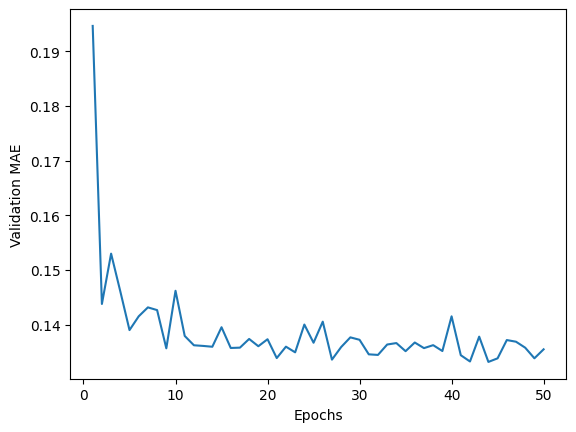

In [215]:
average_mae_history2 =[
    np.mean([x[i] for x in all_mae_histories2]) for i in range(num_epochs2)
]
plt.plot(range(1, len(average_mae_history2) + 1), average_mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

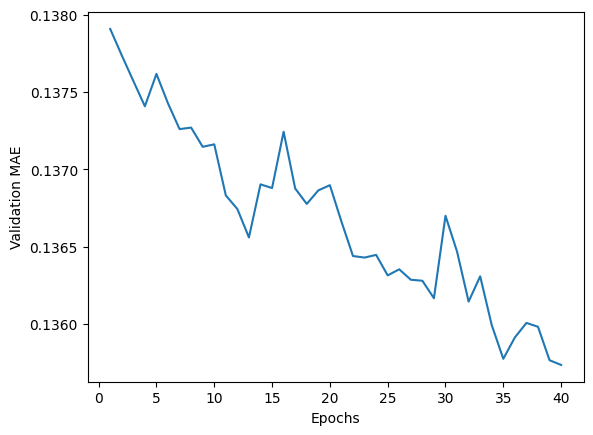

In [216]:
#Сглаживание графика
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history2 = smooth_curve(average_mae_history2[10:])
plt.plot(range(1, len(smooth_mae_history2) + 1), smooth_mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [217]:

model2= build_model2()

model2.fit(Xtrn2, Ytrn2,
         epochs=27, batch_size=4, verbose=1)
test_mse_score2, test_mae_score2 = model2.evaluate(Xtest2, Ytest2)

Epoch 1/27
175/175 [==============================] - 0s 748us/step - loss: 0.0442 - mae: 0.1645
Epoch 2/27
175/175 [==============================] - 0s 749us/step - loss: 0.0379 - mae: 0.1577
Epoch 3/27
175/175 [==============================] - 0s 751us/step - loss: 0.0361 - mae: 0.1512
Epoch 4/27
175/175 [==============================] - 0s 744us/step - loss: 0.0342 - mae: 0.1466
Epoch 5/27
175/175 [==============================] - 0s 746us/step - loss: 0.0337 - mae: 0.1472
Epoch 6/27
175/175 [==============================] - 0s 747us/step - loss: 0.0326 - mae: 0.1437
Epoch 7/27
175/175 [==============================] - 0s 757us/step - loss: 0.0326 - mae: 0.1457
Epoch 8/27
175/175 [==============================] - 0s 741us/step - loss: 0.0314 - mae: 0.1419
Epoch 9/27
175/175 [==============================] - 0s 747us/step - loss: 0.0316 - mae: 0.1407
Epoch 10/27
175/175 [==============================] - 0s 749us/step - loss: 0.0312 - mae: 0.1404
Epoch 11/27
175/175 [========

In [218]:
test_mae_score2

0.13893413543701172

In [219]:
y_pred2 = model2.predict(Xtest2)

error(y_pred2, Ytest2) 
Xtest2 

10/10 [==============================] - 0s 704us/step
mean_absolute_error(y_true, y_pred)=0.13893413985417466
mean_absolute_percentage_error(y_true, y_pred)=0.2746352655977776
mean_squared_error(y_true, y_pred)=0.029093987496689313


Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
537          0.509153               0.259198                     0.833186   
756          0.471233               0.210160                     0.406082   
759          0.700658               0.088539                     0.287928   
677          0.579370               0.420160                     0.748506   
423          0.373827               0.378414                     0.512036   
..                ...                    ...                          ...   
483          0.760172               0.393657                     0.455692   
958          0.480576               0.204933                     0.996825   
441          0.352255               0.168967                     0.415156   
9            0.772842               0.861312                     0.608021   
161          0.444291               0.259211                     0.604350   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
537                         0.858396                  0.542777   
756                         0.489163                  0.914348   
759                         0.642083                  0.411889   
677                         0.974736                  0.568609   
423                         0.300015                  0.388094   
..                               ...                       ...   
483                         0.762389                  0.599349   
958                         0.371747                  0.692817   
441                         0.164165                  0.497721   
9                           0.418887                  0.549664   
161                         0.622283                  0.415966   

     Поверхностная плотность, г/м2  Потребление смолы, г/м2  \
537                       0.310748                 0.826006   
756                       0.169342                 0.577467   
759                       0.554467                 0.475626   
677                       0.612703                 0.095559   
423                       0.662721                 0.258116   
..                             ...                      ...   
483                       0.455127                 0.593013   
958                       0.704978                 0.752250   
441                       0.054555                 0.790104   
9                         0.782031                 0.748729   
161                       0.784670                 0.477957   

     Угол нашивки, град  Шаг нашивки  Плотность нашивки  
537                 0.0     0.395193           0.606088  
756                 1.0     0.493100           0.383679  
759                 1.0     0.370668           0.447643  
677                 1.0     0.760333           0.321540  
423                 0.0     0.605451           0.462826  
..                  ...          ...                ...  
483                 0.0     0.381818           0.628311  
958                 1.0     0.472654           0.615517  
441                 0.0     0.084491           0.587531  
9                   0.0     0.483401           0.544652  
161                 0.0     0.379992           0.649848  

[300 rows x 10 columns]

## Предсказание параметра "Прочность при растяжении, МПа" 

In [228]:
def build_model3():
    model3=models.Sequential()
    model3.add(layers.Dense(64, activation='tanh', input_shape=(Xtrn3.shape[1],)))
    model3.add(layers.Dense(64, activation='tanh'))
    model3.add(layers.Dense(1))
    model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model3

In [229]:
k3 = 4
num_val_samples3 = len(Xtrn3) // k3
num_epochs3 = 50
all_scores3 = []
for i3 in range(k3):
    print('processing fold #', i3)

    val_data3 = Xtrn3[i3 * num_val_samples3: (i3 + 1) * num_val_samples3]
    val_targets3 = Ytrn3[i3 * num_val_samples3: (i3 + 1) * num_val_samples3]

    partial_train_data3 = np.concatenate(
        [Xtrn3[:i3 * num_val_samples3],
         Xtrn3[(i3 + 1) * num_val_samples3:]],
        axis=0)
    partial_train_targets3 = np.concatenate(
        [Ytrn3[:i3 * num_val_samples3],
         Ytrn3[(i3 + 1) * num_val_samples3:]],
        axis=0)
    

    model3 = build_model3()

    model3.fit(partial_train_data3, partial_train_targets3,
              epochs=num_epochs3, batch_size=1, verbose=0)

    val_mse3, val_mae3 = model3.evaluate(val_data3, val_targets3, verbose=0)
    all_scores3.append(val_mae3)
print('done')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
done


In [230]:
all_scores3

[0.15910322964191437,
 0.13982611894607544,
 0.13781675696372986,
 0.1385684460401535]

In [231]:
np.mean(all_scores3)

0.1438286378979683

In [232]:
num_epochs3 = 50
all_mae_histories3 = []
for i3 in range(k3):
    print('processing fold #%d' % i3)
    val_data3 = Xtrn3[i3 * num_val_samples3: (i3 + 1) * num_val_samples3]
    val_targets3 = Ytrn3[i3 * num_val_samples3: (i3 + 1) * num_val_samples3]
    partial_train_data3 = np.concatenate(
        [Xtrn3[:i3 * num_val_samples3],
         Xtrn3[(i3 + 1) * num_val_samples3:]],
        axis=0)
    partial_train_targets3 = np.concatenate(
        [Ytrn3[:i3 * num_val_samples3],
         Ytrn3[(i3 + 1) * num_val_samples3:]],
        axis=0)
    model3 = build_model3()
    history3 = model3.fit(partial_train_data3, partial_train_targets3,
                        validation_data=(val_data3, val_targets3),
                        epochs=num_epochs3, batch_size=1, verbose=0)
    mae_history3 = history3.history['val_mae']
    all_mae_histories3.append(mae_history3)
print('done')

processing fold #0
processing fold #1
processing fold #2
processing fold #3
done


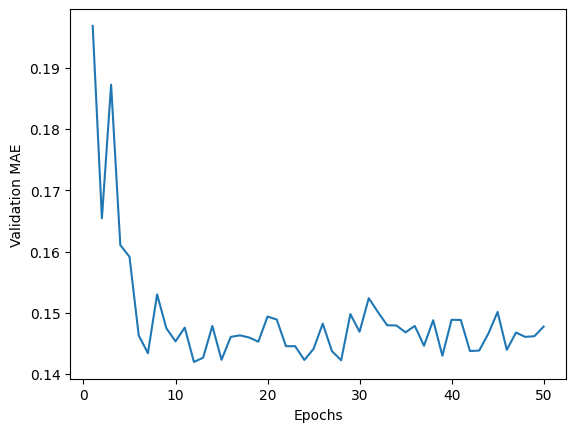

In [233]:

average_mae_history3 =[
    np.mean([x[i] for x in all_mae_histories3]) for i in range(num_epochs3)
]
plt.plot(range(1, len(average_mae_history3) + 1), average_mae_history3)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

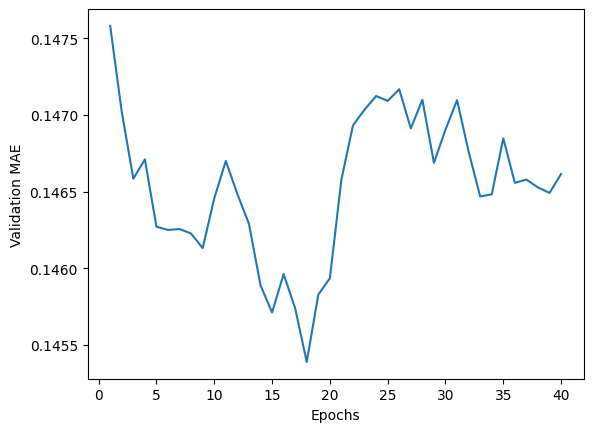

In [234]:
#Сглаживание графика
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history3 = smooth_curve(average_mae_history3[10:])
plt.plot(range(1, len(smooth_mae_history3) + 1), smooth_mae_history3)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [235]:

model3= build_model3()

model3.fit(Xtrn3, Ytrn3,
         epochs=28, batch_size=4, verbose=1)
test_mse_score3, test_mae_score3 = model3.evaluate(Xtest3, Ytest3)

Epoch 1/28
175/175 [==============================] - 0s 747us/step - loss: 0.0473 - mae: 0.1723
Epoch 2/28
175/175 [==============================] - 0s 751us/step - loss: 0.0415 - mae: 0.1619
Epoch 3/28
175/175 [==============================] - 0s 748us/step - loss: 0.0402 - mae: 0.1599
Epoch 4/28
175/175 [==============================] - 0s 752us/step - loss: 0.0376 - mae: 0.1552
Epoch 5/28
175/175 [==============================] - 0s 750us/step - loss: 0.0373 - mae: 0.1541
Epoch 6/28
175/175 [==============================] - 0s 748us/step - loss: 0.0348 - mae: 0.1473
Epoch 7/28
175/175 [==============================] - 0s 751us/step - loss: 0.0356 - mae: 0.1498
Epoch 8/28
175/175 [==============================] - 0s 748us/step - loss: 0.0350 - mae: 0.1475
Epoch 9/28
175/175 [==============================] - 0s 747us/step - loss: 0.0350 - mae: 0.1480
Epoch 10/28
175/175 [==============================] - 0s 751us/step - loss: 0.0348 - mae: 0.1481
Epoch 11/28
175/175 [========

In [236]:
test_mae_score3

0.1332150101661682

In [237]:
y_pred3 = model3.predict(Xtest3)

error(y_pred3, Ytest3)

10/10 [==============================] - 0s 711us/step
mean_absolute_error(y_true, y_pred)=0.13321500547614723
mean_absolute_percentage_error(y_true, y_pred)=0.26068303758964584
mean_squared_error(y_true, y_pred)=0.028651397883696982


## Оценить точность модели на тренировочном и тестовом датасете

In [238]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [239]:
Xtest2.insert(0, 'pred1', y_pred1)
Xtest2.insert(7, 'pred2', y_pred2)
Xtest2.insert(8, 'pred3', y_pred3)
Xtest2

pred1  Плотность, кг/м3  модуль упругости, ГПа  \
537  0.493018          0.509153               0.259198   
756  0.443670          0.471233               0.210160   
759  0.441706          0.700658               0.088539   
677  0.459123          0.579370               0.420160   
423  0.496202          0.373827               0.378414   
..        ...               ...                    ...   
483  0.480231          0.760172               0.393657   
958  0.486097          0.480576               0.204933   
441  0.470220          0.352255               0.168967   
9    0.493185          0.772842               0.861312   
161  0.486629          0.444291               0.259211   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
537                     0.833186                         0.858396   
756                     0.406082                         0.489163   
759                     0.287928                         0.642083   
677                     0.748506                         0.974736   
423                     0.512036                         0.300015   
..                           ...                              ...   
483                     0.455692                         0.762389   
958                     0.996825                         0.371747   
441                     0.415156                         0.164165   
9                       0.608021                         0.418887   
161                     0.604350                         0.622283   

     Температура вспышки, С_2  Поверхностная плотность, г/м2     pred2  \
537                  0.542777                       0.310748  0.562457   
756                  0.914348                       0.169342  0.542145   
759                  0.411889                       0.554467  0.548354   
677                  0.568609                       0.612703  0.511904   
423                  0.388094                       0.662721  0.472840   
..                        ...                            ...       ...   
483                  0.599349                       0.455127  0.573763   
958                  0.692817                       0.704978  0.531549   
441                  0.497721                       0.054555  0.512727   
9                    0.549664                       0.782031  0.494625   
161                  0.415966                       0.784670  0.561300   

        pred3  Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
537  0.493112                 0.826006                 0.0     0.395193   
756  0.539799                 0.577467                 1.0     0.493100   
759  0.495446                 0.475626                 1.0     0.370668   
677  0.435943                 0.095559                 1.0     0.760333   
423  0.515849                 0.258116                 0.0     0.605451   
..        ...                      ...                 ...          ...   
483  0.491363                 0.593013                 0.0     0.381818   
958  0.515451                 0.752250                 1.0     0.472654   
441  0.589954                 0.790104                 0.0     0.084491   
9    0.497793                 0.748729                 0.0     0.483401   
161  0.505754                 0.477957                 0.0     0.379992   

     Плотность нашивки  
537           0.606088  
756           0.383679  
759           0.447643  
677           0.321540  
423           0.462826  
..                 ...  
483           0.628311  
958           0.615517  
441           0.587531  
9             0.544652  
161           0.649848  

[300 rows x 13 columns]

In [240]:
col = Xtest2.columns
X_test_2 = pd.DataFrame(transformer.inverse_transform(Xtest2), columns = col, index=Xtest2.index)
X_test_2

pred1  Плотность, кг/м3  модуль упругости, ГПа  \
537  2.954249       1992.347486             429.331156   
756  2.697522       1976.866009             348.566270   
759  2.687308       2070.530524             148.258590   
677  2.777915       2021.013801             694.430768   
423  2.970814       1937.099504             625.676635   
..        ...               ...                    ...   
483  2.887728       2094.827518             650.780909   
958  2.918243       1980.680537             339.957349   
441  2.835648       1928.292618             280.722589   
9    2.955120       2100.000000            1421.000000   
161  2.921011       1965.866800             429.352589   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
537                   165.678444                        27.077533   
756                    96.105158                        22.181806   
759                    76.858347                        24.209401   
677                   151.884465                        28.620116   
423                   113.364498                        19.673848   
..                           ...                              ...   
483                   104.186343                        25.804564   
958                   192.334469                        20.624966   
441                    97.583261                        17.872587   
9                     129.000000                        21.250000   
161                   128.402011                        23.946868   

     Температура вспышки, С_2  Поверхностная плотность, г/м2      pred2  \
537                298.414701                     401.696847  74.531506   
756                383.938404                     219.180255  74.153129   
759                268.288453                     716.274381  74.268802   
677                304.360421                     791.442174  73.589796   
423                262.811604                     856.001452  72.862123   
..                        ...                            ...        ...   
483                311.435750                     588.052464  74.742104   
958                332.949267                     910.544705  73.955749   
441                288.044441                      71.020110  73.605127   
9                  300.000000                    1010.000000  73.267929   
161                269.226886                    1013.405237  74.509951   

           pred3  Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
537  2423.280080               326.726575                 0.0     5.729555   
756  2554.544005               240.768043                90.0     7.139702   
759  2429.843309               205.546133                90.0     5.376332   
677  2262.544128                74.097866                90.0    10.988622   
423  2487.207889               130.318866                 0.0     8.757877   
..           ...                      ...                 ...          ...   
483  2418.362182               246.144793                 0.0     5.536924   
958  2486.088265               301.217753                90.0     6.845225   
441  2695.558259               314.309799                 0.0     1.254546   
9    2436.440726               300.000000                 0.0     7.000000   
161  2458.825657               206.352177                 0.0     5.510619   

     Плотность нашивки  
537          64.447476  
756          48.346839  
759          52.977356  
677          43.848512  
423          54.076432  
..                 ...  
483          66.056243  
958          65.130087  
441          63.104127  
9            60.000000  
161          67.615311  

[300 rows x 13 columns]

In [241]:
print('Метрики для параметра "Соотношение матрица-наполнитель"')
error(X_test_2['pred1'], df.loc[Ytest1.index.tolist()]['Соотношение матрица-наполнитель']) 
print('Метрики для параметра "Модуль упругости при растяжении, ГПа"')
error(X_test_2['pred2'], df.loc[Ytest2.index.tolist()]['Модуль упругости при растяжении, ГПа']) 
print('Метрики для параметра "Прочность при растяжении, МПа"')
error(X_test_2['pred3'], df.loc[Ytest3.index.tolist()]['Прочность при растяжении, МПа']) 

Метрики для параметра "Соотношение матрица-наполнитель"
mean_absolute_error(y_true, y_pred)=0.7411240529527512
mean_absolute_percentage_error(y_true, y_pred)=0.2551355870507931
mean_squared_error(y_true, y_pred)=0.8647640701715527
Метрики для параметра "Модуль упругости при растяжении, ГПа"
mean_absolute_error(y_true, y_pred)=2.588063833922476
mean_absolute_percentage_error(y_true, y_pred)=0.035198464732952024
mean_squared_error(y_true, y_pred)=10.095672697548235
Метрики для параметра "Прочность при растяжении, МПа"
mean_absolute_error(y_true, y_pred)=374.54466195181175
mean_absolute_percentage_error(y_true, y_pred)=0.15123141833250647
mean_squared_error(y_true, y_pred)=226488.8076922671


## Разработать приложение 

Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

Решено разработать веб-приложение с помощью языка Python, фреймворка Flask и шаблонизатора Jinja.

Для использования в приложении обученных моделей их надо сохранить. Модели из библиотеки sklearn сохраняю с помощью pickle. Модели из библиотеки tensorflow имеют собственный механизм сохранения.